In [1]:
import os
import pandas as pd
import networkx as nx
# show current directory
print(os.getcwd())

/users-2/amine/pcax24/examples


In [2]:
def load_graph(file_path):
    graph_data = pd.read_csv(file_path, sep='\t', header=None, comment='%', names=['from', 'to', 'weight'])
    graph_data.dropna(inplace=True)
    return graph_data

def remove_cycles_simplified(graph_data):
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])
    
    removed_edges = []
    while True:
        try:
            cycle = nx.find_cycle(G)
            if not cycle:
                break
            # Remove the first edge in the cycle (simplified approach)
            edge_to_remove = cycle[0]
            G.remove_edge(*edge_to_remove)
            removed_edges.append(edge_to_remove)
        except nx.NetworkXNoCycle:
            break

    return G, removed_edges

# Path to the file
file_path = 'data/out.dimacs10-celegansneural'

# Load the graph data
graph_data = load_graph(file_path)

In [3]:
# show number of nodes in the graph
print(len(graph_data['from'].unique()))
# show number of edges in the graph
print(len(graph_data))

297
4296


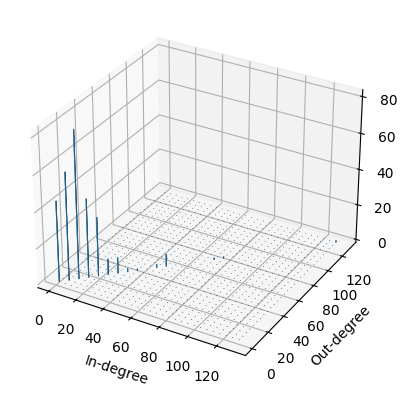

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_indegree_outdegree_distribution(graph_data):
    # Create a directed graph
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])

    # Calculate in-degree and out-degree for each node
    indegrees = dict(G.in_degree())
    outdegrees = dict(G.out_degree())

    # Prepare data for plotting
    indegree_values = np.array(list(indegrees.values()))
    outdegree_values = np.array(list(outdegrees.values()))

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    hist, xedges, yedges = np.histogram2d(indegree_values, outdegree_values, bins=30)

    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

    ax.set_xlabel('In-degree')
    ax.set_ylabel('Out-degree')
    ax.set_zlabel('Frequency')

    plt.show()

# Plot the indegree and outdegree distribution
plot_indegree_outdegree_distribution(graph_data)


In [5]:
# please show the unique weight values in the graph
print(graph_data['weight'].unique())

[ 1  2  6  4  3  9 11  5 16  7 48 25 72 37 18 12 14 10 27  8 17 19 20 13
 36 15 29 24 22 31 23 30 28 61 63]


In [6]:
graph_data.head()

,from,to,weight
0,1,2,1
1,1,3,2
2,1,4,1
3,1,5,2
4,1,6,1


In [7]:
# Create a directed networkx graph from the graph data using nx.from_pandas_edgelist
G_pandas = nx.from_pandas_edgelist(graph_data, 'from', 'to', edge_attr='weight', create_using=nx.DiGraph)

In [8]:
# Let's convert the pandas DataFrame into a NetworkX Directed Graph (DiGraph)

import networkx as nx

def convert_to_digraph(graph_data):
    G = nx.DiGraph()
    for index, row in graph_data.iterrows():
        G.add_edge(row['from'], row['to'], weight=row['weight'])
    return G

# Convert the pandas DataFrame to a NetworkX DiGraph
G = convert_to_digraph(graph_data)

# Display basic information about the graph
print(G)


DiGraph with 297 nodes and 4296 edges


In [9]:
import scipy.io
import numpy as np
import networkx as nx

# Load the .mat file
file_path = 'data/ConnOrdered_040903.mat'
mat = scipy.io.loadmat(file_path)

# Load the keys 'A_init_t_ordered', 'Ag_t_ordered',
A_init_t_ordered = np.array(mat['A_init_t_ordered'].todense())
print('A_init_t_ordered shape:', A_init_t_ordered.shape)
Ag_t_ordered = np.array(mat['Ag_t_ordered'].todense())
print('Ag_t_ordered shape:', Ag_t_ordered.shape)

# Create NetworkX DiGraphs from the adjacency matrices
G_A_init_t_ordered = nx.DiGraph(A_init_t_ordered)
G_Ag_t_ordered = nx.DiGraph(Ag_t_ordered)

# Function to print basic graph info
def print_graph_info(G, name):
    print(f"{name} has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    print(f"Graph density of {name}: {nx.density(G)}")
    print(f"Graph {name} is directed: {G.is_directed()}")


A_init_t_ordered shape: (279, 279)
Ag_t_ordered shape: (279, 279)


In [10]:
# Print information about all the graphs G, G_pandas, G_A_init_t_ordered, and G_Ag_t_ordered and print a new line after each graph info
print_graph_info(G, 'G')
print()
print_graph_info(G_pandas, 'G_pandas')
print()
print_graph_info(G_A_init_t_ordered, 'G_A_init_t_ordered')
print()
print_graph_info(G_Ag_t_ordered, 'G_Ag_t_ordered')
print()

G has 297 nodes and 4296 edges.
Graph density of G: 0.048867048867048866
Graph G is directed: True

G_pandas has 297 nodes and 4296 edges.
Graph density of G_pandas: 0.048867048867048866
Graph G_pandas is directed: True

G_A_init_t_ordered has 279 nodes and 2194 edges.
Graph density of G_A_init_t_ordered: 0.028287047781129934
Graph G_A_init_t_ordered is directed: True

G_Ag_t_ordered has 279 nodes and 1031 edges.
Graph density of G_Ag_t_ordered: 0.01329259173306516
Graph G_Ag_t_ordered is directed: True



In [11]:
# Compare with the previously loaded connectome data
def compare_graphs(G1, G2):
    print(f"Graph 1 has {G1.number_of_nodes()} nodes and {G1.number_of_edges()} edges.")
    print(f"Graph 2 has {G2.number_of_nodes()} nodes and {G2.number_of_edges()} edges.")
    common_edges = len(set(G1.edges()).intersection(set(G2.edges())))
    print(f"Number of common edges: {common_edges}")

# Assuming G is the previously loaded connectome data graph
compare_graphs(G, G_pandas)

Graph 1 has 297 nodes and 4296 edges.
Graph 2 has 297 nodes and 4296 edges.
Number of common edges: 4296


In [12]:
import networkx as nx

def are_digraphs_equivalent(G1, G2):
    # Check if both graphs have the same set of nodes
    if set(G1.nodes) != set(G2.nodes):
        return False
    
    # Check if both graphs have the same set of edges
    if set(G1.edges) != set(G2.edges):
        return False
    
    # Check if all corresponding edges have the same weights
    for (u, v) in G1.edges:
        if G1[u][v]['weight'] != G2[u][v]['weight']:
            return False
    
    return True

# Example usage
# Assuming G_A_init_t_ordered and G_Ag_t_ordered are your graphs
G1 = G_A_init_t_ordered  # Replace with your first graph
G2 = G_Ag_t_ordered      # Replace with your second graph

equivalent = are_digraphs_equivalent(G1, G2)
print("The graphs are equivalent:", equivalent)


The graphs are equivalent: False


In [13]:
equivalent = are_digraphs_equivalent(G, G_pandas)
print("The graphs are equivalent:", equivalent)


The graphs are equivalent: True


In [14]:
# Check if the graphs are DAGs
def check_if_dag(G, name):
    is_dag = nx.is_directed_acyclic_graph(G)
    print(f"{name} is a DAG: {is_dag}")

# Checking all four graphs
check_if_dag(G, "G")
check_if_dag(G_pandas, "G_pandas")
check_if_dag(G_A_init_t_ordered, "G_A_init_t_ordered (G1)")
check_if_dag(G_Ag_t_ordered, "G_Ag_t_ordered (G2)")

G is a DAG: False
G_pandas is a DAG: False
G_A_init_t_ordered (G1) is a DAG: False
G_Ag_t_ordered (G2) is a DAG: False
